In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

nondef1, nondef2, nondef3, nondef4, nondef5 = sy.symbols('nondef1, nondef2, nondef3, nondef4, nondef5')      

In [3]:
# Präfixe
_nano = 10 ** (-9)
_mikro = 10 ** (-6)
_milli = 10 ** (-3)
_centi = 10 ** (-2)
_dezi = 10 ** (-1)

_Kilo = 10 ** 3
_Mega = 10 ** 6
_Giga = 10 ** 9
_Tera = 10 ** 12

# Winkel
_degree = 2*np.pi/360

In [4]:
# feste Parameter und ihre Zahlenwerte: diese werden später in der Fehlerfunktion numerisch gemacht aber bleiben für die partiellen Ableitungen symbolisch
g, pi, mu_0, G = sy.symbols('g, pi, mu_0, G')            
                                                
fix_parameters = {
    G: 6.672 * 10 ** (-11),
    g: 9.81, 
    pi: 3.141,
    mu_0: 4 * np.pi * 10 **(-7),
}   

In [5]:
# verwendbare, symbolische Variablen, Zusätzliche einfach hinzufügen
t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy = sy.symbols('t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy')                     

In [6]:
def err_gauss(f, var1, x1, err1, var2=nondef1, x2=0, err2=0, var3=nondef2, x3=0, err3=0, var4=nondef3, x4=0, err4=0, var5=nondef4, x5=0, err5=0):
    f_x1 = sy.diff(f, var1)
    # print(f'Ableitung nach {var1}: {f_x1}')   
    f_x1 = f_x1.subs({var2: x2, var3: x3, var4: x4, var5: x5})
    f_x2 = sy.diff(f, var2)
    # if f_x2 != 0:
        # print(f'Ableitung nach {var2}: {f_x2}')   
    f_x2 = f_x2.subs({var1: x1, var3: x3, var4: x4, var5: x5})
    f_x3 = sy.diff(f, var3)
    # if f_x3 != 0:
        # print(f'Ableitung nach {var3}: {f_x3}')   
    f_x3 = f_x3.subs({var1: x1, var2: x2, var4: x4, var5: x5})
    f_x4 = sy.diff(f, var4)
    # if f_x4 != 0:
        # print(f'Ableitung nach {var4}: {f_x4}')   
    f_x4 = f_x4.subs({var1: x1, var2: x2, var3: x3, var5: x5})
    f_x5 = sy.diff(f, var5)
    # if f_x5 != 0:
        # print(f'Ableitung nach {var5}: {f_x5}')   
    f_x5 = f_x5.subs({var1: x1, var2: x2, var3: x3, var4: x4})

    # feste paramter numerisch machen
    f = f.subs(fix_parameters)
    f_x1 = f_x1.subs(fix_parameters)
    f_x2 = f_x2.subs(fix_parameters)
    f_x3 = f_x3.subs(fix_parameters)
    f_x4 = f_x4.subs(fix_parameters)
    f_x5 = f_x5.subs(fix_parameters)

    value = f.subs({var1: x1, var2: x2, var3: x3, var4: x4, var5: x5})
    error = (err1**2*(f_x1.subs(var1, x1))**2+err2**2*(f_x2.subs(var2, x2))**2+err3**2*(f_x3.subs(var3, x3))**2+err4**2*(f_x4.subs(var4, x4))**2+err5**2*(f_x5.subs(var5, x5))**2)**0.5
    # print(f'Wert: {value} +/- Fehler: {error}')
    return (value, error)

In [7]:
def gew_mittel(ar_val, ar_err):
    value_num = 0
    sigma_denom = 0
    for i in range(len(ar_val)):
        value_num += ar_val[i]/ar_err[i]**2
        sigma_denom += 1/ar_err[i]**2
    value = value_num/sigma_denom
    sigma = (1/sigma_denom)**0.5
    print(f'gew. Mittelwert: {value} +/- sigma: {sigma}')
    return (value, sigma)

In [8]:
# Import der Messwerte
a_spalt_dataframe = np.loadtxt('24_data/a_spalt_12000', skiprows = 0, delimiter = '\t')
b_steg_dataframe = np.loadtxt('24_data/b_steg_12000', skiprows = 0 + 1, delimiter = '\t')
c_kreisblende_dataframe = np.loadtxt('24_data/c_kreisblende_140_50', skiprows = 0, delimiter = '\t')
d_doppellochblende_dataframe = np.loadtxt('24_data/d_doppellochblende_100_50', skiprows = 0, delimiter = '\t')
e_gitter_dataframe = np.loadtxt('24_data/e_gitter_240_50', skiprows = 0, delimiter = '\t')


# Hauptmaxima
max_spalt = 13050
max_steg = 19900
max_kreisblende = 20000
max_doppellochblende = 20000
max_gitter = 19350 

# (a) Spalt
motorposition_spalt = (a_spalt_dataframe[:,0] - max_spalt) / 400
photospannung_spalt = a_spalt_dataframe[:,1]

# (b) Steg
motorposition_steg = (b_steg_dataframe[:,0] - max_steg) / 400
photospannung_steg = b_steg_dataframe[:,1]

# (c) Kreisblende
motorposition_kreisblende = (c_kreisblende_dataframe[:,0] - max_kreisblende) / 400
photospannung_kreisblende = c_kreisblende_dataframe[:,1]

# (d) Doppellochblende
motorposition_doppellochblende = (d_doppellochblende_dataframe[:,0] - max_doppellochblende) / 400
photospannung_doppellochblende = d_doppellochblende_dataframe[:,1]

# (e) Gitter
motorposition_gitter = (e_gitter_dataframe[:,0] - max_gitter) / 400
photospannung_gitter = e_gitter_dataframe[:,1]

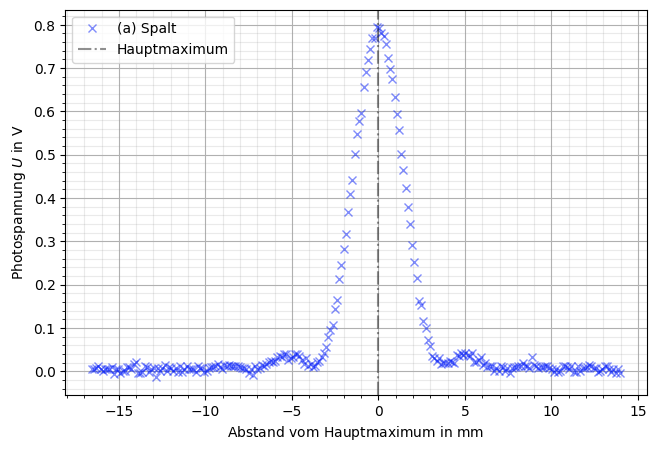

In [9]:
# (a) Spalt
fig, ax = plt.subplots(figsize=(7.5,5))

#'#FE7018'
#'xkcd:deep sky blue' 
#'xkcd:watermelon'
#'xkcd:electric blue'
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_spalt, photospannung_spalt, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(a) Spalt')
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
#plt.vlines(x = [13000], ymin = 0.2, ymax = 1, colors = 'purple', ls = '--', lw = 2, label = 'vline_multiple - full height')
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

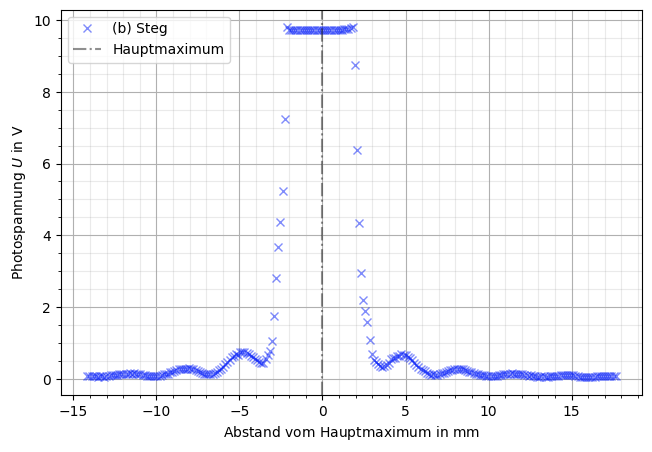

In [10]:
# (b) Steg
fig, ax = plt.subplots(figsize=(7.5,5))

ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_steg, photospannung_steg, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(b) Steg')
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

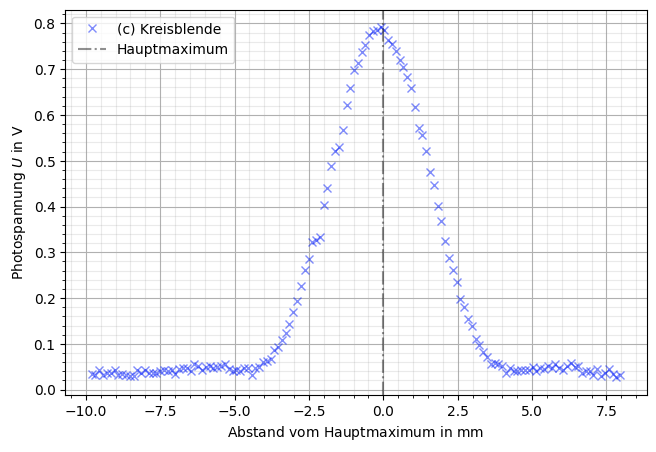

In [11]:
# (c) Kreisblende
fig, ax = plt.subplots(figsize=(7.5,5))

ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_kreisblende, photospannung_kreisblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(c) Kreisblende')
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

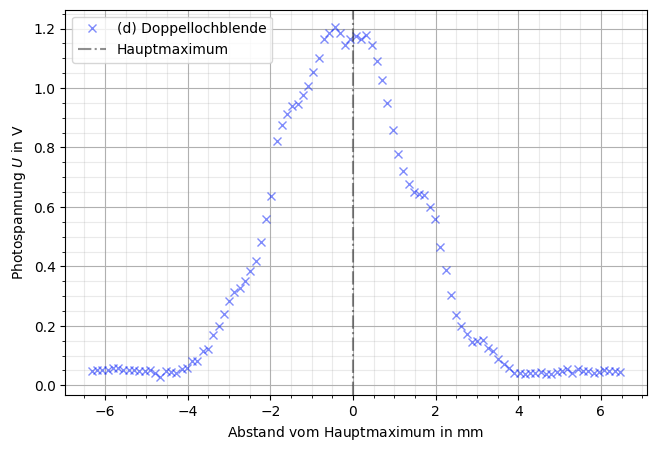

In [12]:
# (d) Doppellochblende
fig, ax = plt.subplots(figsize=(7.5,5))

ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_doppellochblende, photospannung_doppellochblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(d) Doppellochblende')
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

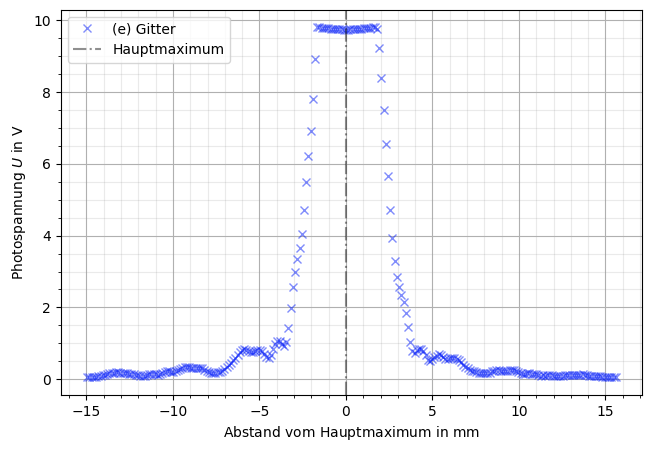

In [13]:
# (e) Gitter
fig, ax = plt.subplots(figsize=(7.5,5))

ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_gitter, photospannung_gitter, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(e) Gitter')
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()